### 0. 事前準備

以下のデータを取得して、このノートブックと同じディレクトリにある`data`ディレクトリに配置します。

__New York City Airbnb Open Data__  
  URL:  
  ・https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/  
  DATA:  
  ・AB_NYC_2019.csv

In [1]:
%matplotlib inline

import branca.colormap as cm
import folium
from folium.plugins import HeatMap
import pandas as pd
import seaborn as sns

### 1. 行、列の指定による抽出

Airbnbの掲載データをロード。

In [2]:
ab_listings_df = pd.read_csv('data/AB_NYC_2019.csv')

len(ab_listings_df)

48895

データの中身を確認。

In [3]:
ab_listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### 1-1. 行番号、列番号の指定
行番号、列番号の指定には`pandas.DataFrame.iloc`属性を利用。  
`pandas.DataFrame.iloc`はメソッドではないので、角括弧に番号を指定します。

３行目を抽出。

In [4]:
ab_listings_df.iloc[2] # 番号は0から始まる

id                                                               3647
name                              THE VILLAGE OF HARLEM....NEW YORK !
host_id                                                          4632
host_name                                                   Elisabeth
neighbourhood_group                                         Manhattan
neighbourhood                                                  Harlem
latitude                                                     40.80902
longitude                                                    -73.9419
room_type                                                Private room
price                                                             150
minimum_nights                                                      3
number_of_reviews                                                   0
last_review                                                       NaN
reviews_per_month                                                 NaN
calculated_host_list

2〜4行目を抽出。  
「（始まりの番号）:（終わりの番号+1）」と指定。

In [5]:
ab_listings_df.iloc[1:4] # 番号は0から始まる

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


6列目を抽出。  
行を指定しない場合は「:」（コロン）とします。

In [6]:
ab_listings_df.iloc[:,5] # 番号は0から始まる

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

#### 1-2. 行ラベル、列ラベルの指定
行番号、列番号の指定には`pandas.DataFrame.loc`属性を利用。  
`pandas.DataFrame.loc`もメソッドではないので、角括弧に番号を指定します。

行ラベルを作るために`neighbourhood`でグループ分けします。

In [7]:
ab_listings_group_by_neighbourhood_df = ab_listings_df.groupby('neighbourhood').mean().round(2) # とりあえず平均。

ab_listings_group_by_neighbourhood_df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,,,,,,,,,,
Allerton,20077286.48,1.052045e+08,40.87,-73.86,87.60,2.21,42.93,1.83,2.76,163.67
Arden Heights,29356194.00,1.695545e+08,40.55,-74.18,67.25,9.50,7.75,1.04,1.00,94.25
Arrochar,20774406.90,8.173055e+07,40.59,-74.07,115.00,2.76,14.62,1.11,4.19,255.81
Arverne,21294997.45,8.311746e+07,40.59,-73.79,171.78,1.65,29.26,1.77,1.66,188.43
Astoria,18958950.73,6.845130e+07,40.76,-73.92,117.19,6.04,21.46,1.27,2.77,109.19


任意の行ラベルで抽出。

In [8]:
ab_listings_group_by_neighbourhood_df.loc['Arden Heights']

id                                2.935619e+07
host_id                           1.695545e+08
latitude                          4.055000e+01
longitude                        -7.418000e+01
price                             6.725000e+01
minimum_nights                    9.500000e+00
number_of_reviews                 7.750000e+00
reviews_per_month                 1.040000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  9.425000e+01
Name: Arden Heights, dtype: float64

任意の列ラベルで抽出。  
行を指定しない場合は「:」を置きます。

In [9]:
ab_listings_df.loc[:,'neighbourhood']

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

列ラベルで抽出する場合は、`loc`を使わずにそのまま角括弧で指定できます。

In [10]:
ab_listings_df['neighbourhood']

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
                ...        
48890    Bedford-Stuyvesant
48891              Bushwick
48892                Harlem
48893        Hell's Kitchen
48894        Hell's Kitchen
Name: neighbourhood, Length: 48895, dtype: object

### 2. 条件指定による抽出

たとえば、`price`列に対して「100未満」という比較をすると、データの行数分のブール値が返ってきます。

In [11]:
price_under_100_bools = ab_listings_df['price'] < 100

price_under_100_bools

0        False
1        False
2        False
3         True
4         True
         ...  
48890     True
48891     True
48892    False
48893     True
48894     True
Name: price, Length: 48895, dtype: bool

これを元のデータフレームの角括弧に指定すると、Trueに該当する行のみが抽出されます。

In [12]:
price_under_100_df = ab_listings_df[price_under_100_bools]

price_under_100_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


価格の最大値が100ドル以下であることを確認。

In [13]:
price_under_100_df['price'].max()

99

`pandas.DataFrame.loc`でも同じ結果が得られます。

In [14]:
price_under_100_loc_df = ab_listings_df.loc[price_under_100_bools]

price_under_100_loc_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


`pandas.DataFrame.query()`を利用することで、SQLのように書くこともできます。

In [15]:
ab_listings_df.query('host_name == "LisaRoxanne"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


範囲の指定もできます。

In [16]:
ab_listings_df.query('365 < minimum_nights < 500')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,NaN,NaN,1,365
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,NaN,NaN,1,365
34487,27362309,Not available,14621589,Sol,Brooklyn,Bedford-Stuyvesant,40.69974,-73.94658,Private room,50,400,0,NaN,NaN,1,90


これを`query()`を使わないでやると、なかなか面倒です。

In [17]:
### チャレンジしてみよう！！ ###

### 3. ランダム抽出

ランダム抽出は`pandas.DataFrame.sample()`を使えば簡単です。

ここでは説明しやすいよう、毎回同じ結果となるように`random_state`を指定してあります。

参考）  
生命、宇宙、そして万物についての究極の疑問の答え  
https://ja.wikipedia.org/wiki/生命、宇宙、そして万物についての究極の疑問の答え

In [18]:
ab_listings_sample_df = ab_listings_df.sample(frac=0.2, random_state=42) # 全体の20%を抽出

len(ab_listings_sample_df) / len(ab_listings_df)

0.2

ただし、単純に`pandas.DataFrame.sample()`で抽出してしまうと問題がある場合もあります。

たとえばあるホスト（`host_id`=2787）は複数の物件を掲載していますが、その中の一部しか抽出されません。  
この場合、ホストあたりの物件数に焦点を当てた分析が正しくおこなえません。

In [19]:
print("ホスト（host_id=2787）の物件数")

print("・抽出前: ", len(ab_listings_df.query('host_id == 2787')), "件")

print("・抽出後: ", len(ab_listings_sample_df.query('host_id == 2787')), "件")

ホスト（host_id=2787）の物件数
・抽出前:  6 件
・抽出後:  1 件


この場合、ホスト単位でランダム抽出をおこないます。
 
ただし、最終的に抽出される件数が若干ずれる可能性があります。

In [20]:
host_id_sample = pd.Series(ab_listings_df['host_id'].unique()).sample(frac=0.2, random_state=42)

ab_listings_sample_revised_df = ab_listings_df.query('host_id in @host_id_sample') # @マークで変数にアクセス可

ab_listings_sample_revised_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
13,6021,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Claudio,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,2019-07-05,0.91,1,333
25,8505,Sunny Bedroom Across Prospect Park,25326,Gregory,Brooklyn,Windsor Terrace,40.65599,-73.97519,Private room,60,1,19,2019-06-23,1.37,2,85


データ数がおおよそ20%になっていることを確認。

In [21]:
len(ab_listings_sample_revised_df) / len(ab_listings_df)

0.20331322221086

先ほどのホスト（`host_id`=2787）の物件数を確認します。  
全件か、0件になっていれば成功です。

`sample()`の引数`random_state`を数字を変えてもどちらかになるはずです。

In [22]:
print("ホスト（host_id=2787）の物件数")

print("・抽出前: ", len(ab_listings_df.query('host_id == 2787')), "件")

print("・抽出後: ", len(ab_listings_sample_revised_df.query('host_id == 2787')), "件")

ホスト（host_id=2787）の物件数
・抽出前:  6 件
・抽出後:  0 件


### 4. 地図に表示
せっかく緯度経度があるので地図上にデータを表示してみます。

まず、件数が多いので、`folium.plugins.HeatMap`を使って分布を確認します。   
どんなことが読み取れますか？

In [23]:
# ニューヨークの座標
new_york_city_coordinates = [40.7128, -74.0060]

# 全データの座標を抽出し、リストに変換
ab_listings_coords = ab_listings_df[['latitude', 'longitude']].values.tolist()

# 地図を描画
map = folium.Map(location=new_york_city_coordinates, zoom_start=9.5)

HeatMap(ab_listings_coords, radius=5, blur=5).add_to(map)

map

次は任意の500件を抽出し、それぞれの座標上に価格で色分けした円を描きます。

まずヒストグラムで価格の分布を確認。

<AxesSubplot:xlabel='price', ylabel='Count'>

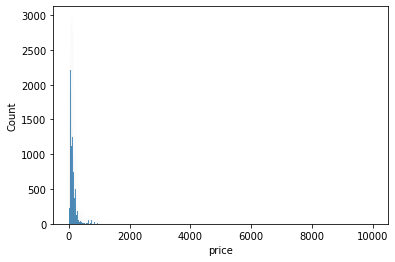

In [24]:
sns.histplot(ab_listings_df['price'], kde=False)

極端な外れ値があるようなので、1,500ドル未満のみを抽出してもう一度確認。

<AxesSubplot:xlabel='price', ylabel='Count'>

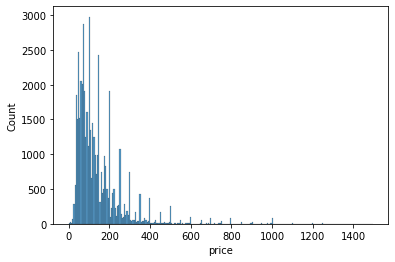

In [25]:
ab_listings_no_too_expensive_df = ab_listings_df[ab_listings_df['price'] < 1500]

sns.histplot(ab_listings_no_too_expensive_df['price'], kde=False)

今度は500件をランダム抽出して分布を確認。  
`sample()`に引数`n=500`を指定します。

分布が大きく変わっていなければOKです。

<AxesSubplot:xlabel='price', ylabel='Count'>

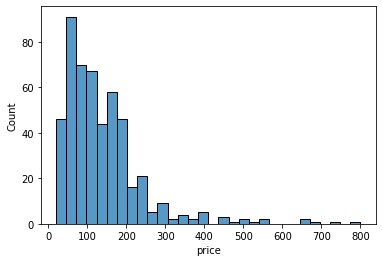

In [26]:
ab_listings_no_too_expensive_sample_df = ab_listings_no_too_expensive_df.sample(n=500)

sns.histplot(ab_listings_no_too_expensive_sample_df['price'], kde=False)

地図上にデータを表示。  
どんなことが読み取れますか？

In [27]:
# ヒストグラムの最大・最小を見ながらカラーマップを設定
colormap = cm.LinearColormap(colors=['blue','red'], vmin=0,vmax=1000)

map = folium.Map(location=new_york_city_coordinates, zoom_start=9.5)

for index, row in ab_listings_no_too_expensive_sample_df.iterrows():
    location = (row['latitude'], row['longitude'])
    color = colormap(row['price'])
    popup_message_html = f"<p>\"{row['name']}\"</p><p>host: {row['host_name']}<p>price: ${row['price']:,}</p></p>"
    popup = folium.Popup(folium.IFrame(popup_message_html), min_width=400, max_width=400)

    folium.Circle(location=location,
                  radius=10,
                  color=color,
                  fill=True,
                  fill_opacity=1,
                  popup=popup).add_to(map)

map